In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

/Users/jteruya/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Matlab Plot Settings

In [2]:
# Display Plot within Jupyter Notebook
%matplotlib inline
# Default Plot Size
plt.rcParams['figure.figsize'] = [10, 10]

## Index Data

In [3]:
# Helper Function
def download_data(ticker, start, end):
    return yf.download(ticker, start, end)

# Start and End Dates for Ticker Data
start_date = "2020-01-01"
end_date = "2020-12-17"
# List of Indices to Retrieve Data
indices = ["^VIX", "^GSPC", "^DJI"]
# List of lists
indices_data = [download_data(index, start_date, end_date) for index in indices]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Percent Movement Per Index
Calculate the % change for each day

In [4]:
# Percent Movement Helper Function
def market_movement(row):
    return (row['Close'] - row['Open'])/row['Open']

# Apply helper function to all index dataframes
percent_movement = [index.apply(market_movement, axis=1) for index in indices_data]

## Visualize Percent Market Per Day

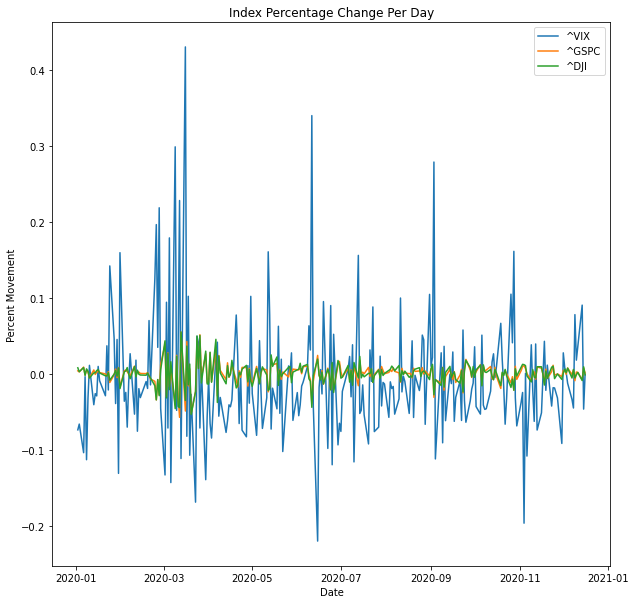

In [5]:
for x in range(len(indices)):
    plt.plot(percent_movement[x], label=indices[x])
plt.xlabel('Date')
plt.ylabel('Percent Movement')
plt.title('Index Percentage Change Per Day')
plt.legend()
plt.show()

## Correlations

In [6]:
# Inital Correlation Dataframe
all_indices_df = pd.concat(percent_movement, axis=1)
all_indices_df.columns = [index[1:] + " Percent Movement" for index in indices]
original_columns = all_indices_df.columns

# Add Timeshifts (by Day)
max_shift = 4
for shift in range(1, max_shift):
    for column in original_columns:
        all_indices_df[column + " + " + str(shift) + " Day Shift"] = all_indices_df[column].shift(-shift)

# Correlations on Columns
all_indices_df.corr(method ='pearson')

,VIX Percent Movement,GSPC Percent Movement,DJI Percent Movement,VIX Percent Movement + 1 Day Shift,GSPC Percent Movement + 1 Day Shift,DJI Percent Movement + 1 Day Shift,VIX Percent Movement + 2 Day Shift,GSPC Percent Movement + 2 Day Shift,DJI Percent Movement + 2 Day Shift,VIX Percent Movement + 3 Day Shift,GSPC Percent Movement + 3 Day Shift,DJI Percent Movement + 3 Day Shift
VIX Percent Movement,1.000000,-0.661388,-0.621131,-0.181846,0.232101,0.216905,0.212568,-0.156775,-0.171778,-0.015272,-0.068847,-0.022474
GSPC Percent Movement,-0.661388,1.000000,0.961931,0.289029,-0.320105,-0.326744,-0.245378,0.178432,0.189056,0.078207,-0.074651,-0.120564
DJI Percent Movement,-0.621131,0.961931,1.000000,0.269254,-0.287536,-0.306660,-0.224426,0.176211,0.186681,0.051518,-0.050027,-0.106500
VIX Percent Movement + 1 Day Shift,-0.181846,0.289029,0.269254,1.000000,-0.661487,-0.620531,-0.184909,0.233075,0.217922,0.209280,-0.154964,-0.170168
GSPC Percent Movement + 1 Day Shift,0.232101,-0.320105,-0.287536,-0.661487,1.000000,0.962045,0.290272,-0.320385,-0.327051,-0.244752,0.177879,0.188551
DJI Percent Movement + 1 Day Shift,0.216905,-0.326744,-0.306660,-0.620531,0.962045,1.000000,0.271405,-0.288132,-0.307315,-0.222496,0.175055,0.185639
VIX Percent Movement + 2 Day Shift,0.212568,-0.245378,-0.224426,-0.184909,0.290272,0.271405,1.000000,-0.661740,-0.620686,-0.189481,0.235456,0.220074
GSPC Percent Movement + 2 Day Shift,-0.156775,0.178432,0.176211,0.233075,-0.320385,-0.288132,-0.661740,1.000000,0.962041,0.292103,-0.321128,-0.327715
DJI Percent Movement + 2 Day Shift,-0.171778,0.189056,0.186681,0.217922,-0.327051,-0.307315,-0.620686,0.962041,1.000000,0.273267,-0.288895,-0.308008
VIX Percent Movement + 3 Day Shift,-0.015272,0.078207,0.051518,0.209280,-0.244752,-0.222496,-0.189481,0.292103,0.273267,1.000000,-0.661166,-0.620146
